<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/5_recognition_of_all_members_of_class_from_face_images_(you_collected).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Khai báo thư viện

In [9]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape
from keras.preprocessing.image import ImageDataGenerator

# Load dữ liệu

In [10]:
data="/content/drive/MyDrive/201461_Image/"
x,y=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(200,200))
                pixel=img_to_array(pixel)
                x.append(pixel)
                y.append( folder)

x =asarray(x)
y =asarray(y)



Folder= CAO_TAN_PHI_20146513
Folder= CHIU_SANG_HUNG_20146493
Folder= Doan_Thanh_Nam_20146506
Folder= DoNgocHieu_20146157
Folder= NGUYEN_BAO_CHUONG_20146181
Folder= NGUYEN_LAM_TRUONG_20146189
Folder= NGUYEN_LE_PHONG_20146516
Folder= NGUYEN_MINH_TRI_20146540
Folder= NGUYEN_PHI_THANG_20146111
Folder= NGUYEN_THANH_TUNG_20146186
Folder= TRAN_HAO_DONG_20146166
Folder= VO_HUYNH_DUY_THANH_20146191
Folder= VU_DUC_BINH_20146478


# Tạo One_Hot_Encoding

In [11]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
#print(y)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((x,y), file)
# close the file
file.close()
     

In [12]:

def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (x, y) = pickle.load(file)
    # close the file
    file.close()
    return x, y

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

#chuyển đổi dữ liệu tránh overload
#X_train = X_train.reshape(328,144,192,3)
#X_test= X_test.reshape(82,144,192,3)
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255
print(X_train.shape)
print(X_test.shape)

(624, 13)
(624, 200, 200, 3)
(157, 200, 200, 3)


# Tạo model 

In [13]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=   12  #số lần học
classes=13   #phân loại

#tao model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

# Lưu Model

In [14]:
model.save("/content/drive/MyDrive/Colab Notebooks/nhan_dang_sv_CDT.h5")

# Tải Model và dự đoán 

1/1 [==============================] - 0s 414ms/step
This is:  Doan_Thanh_Nam_20146506 [7.4215734e-10 1.6036250e-08 5.3115246e-09 9.9999404e-01 1.3774315e-06
 1.0037780e-07 4.6150781e-08 1.7971939e-07 1.3838721e-07 3.9750371e-06
 1.8856785e-09 2.8318243e-09 6.3488108e-09]
reliability: 99.99940395355225 %


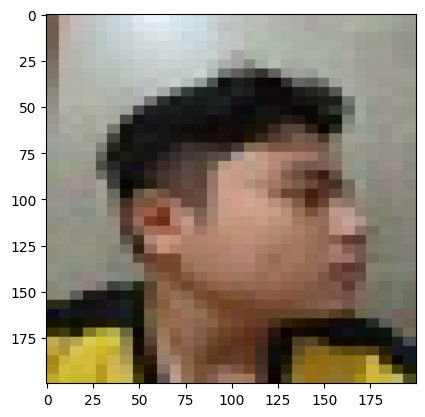

In [15]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/nhan_dang_sv_CDT.h5")

import numpy as np
class_name=['CAO_TAN_PHI_20146513','CHIU_SANG_HUNG_20146493','DoNgocHieu_20146157','Doan_Thanh_Nam_20146506','NGUYEN_BAO_CHUONG_20146181','NGUYEN_LAM_TRUONG_20146189','NGUYEN_LE_PHONG_20146516','NGUYEN_MINH_TRI_20146540','NGUYEN_PHI_THANG_20146111','NGUYEN_THANH_TUNG_20146186','TRAN_HAO_DONG_20146166','VO_HUYNH_DUY_THANH_20146191','VU_DUC_BINH_20146478']

img = load_img('/content/drive/MyDrive/201461_Image/Doan_Thanh_Nam_20146506/IMG_20230327_053141.jpg',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')
     